In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
DATA = pd.read_excel("click_stream3.xlsx")

In [59]:
DATA.head(5)

,id,page,data,user_int,pol
0,313593,1_home_page,2015-02-26,Desktop,Female
1,468315,1_home_page,2015-02-21,Desktop,Male
2,264005,1_home_page,2015-03-25,Desktop,Female
3,290784,1_home_page,2015-03-14,Desktop,Male
4,639104,1_home_page,2015-01-03,Desktop,Female


In [64]:
list_array_step = DATA['page'].unique()
list_array_data = DATA['data'].unique()
print("steps: {}, dats: {}; Количество уникальных дат = {}".format(list_array_step, list_array_data[:5], len(list_array_data)))

steps: ['1_home_page' '2_search_page' '3_payment_page'
 '4_payment_confirmation_page'], dats: ['2015-02-26T00:00:00.000000000' '2015-02-21T00:00:00.000000000'
 '2015-03-25T00:00:00.000000000' '2015-03-14T00:00:00.000000000'
 '2015-01-03T00:00:00.000000000']; Количество уникальных дат = 120


In [181]:
DATA['data_month'] = pd.to_datetime(DATA.data)
DATA['data_month'] = pd.DatetimeIndex(DATA['data_month']).month
DATA['data_month']

0         2
1         2
2         3
3         3
4         1
         ..
142077    1
142078    2
142079    2
142080    3
142081    1
Name: data_month, Length: 142082, dtype: int64

In [182]:
DATA.head(5)

,id,page,data,user_int,pol,data_month
0,313593,1_home_page,2015-02-26,Desktop,Female,2
1,468315,1_home_page,2015-02-21,Desktop,Male,2
2,264005,1_home_page,2015-03-25,Desktop,Female,3
3,290784,1_home_page,2015-03-14,Desktop,Male,3
4,639104,1_home_page,2015-01-03,Desktop,Female,1


In [187]:
list_array_data_month = DATA['data_month'].unique()
list_array_data_month.sort()
list_array_data_month

array([1, 2, 3, 4], dtype=int64)

In [72]:
dict_toonel = {}
data_page = DATA['page']

for step in list_array_step:
    dict_toonel[step] = data_page[data_page == step].count()

dict_toonel

{'1_home_page': 90400,
 '2_search_page': 45200,
 '3_payment_page': 6030,
 '4_payment_confirmation_page': 452}

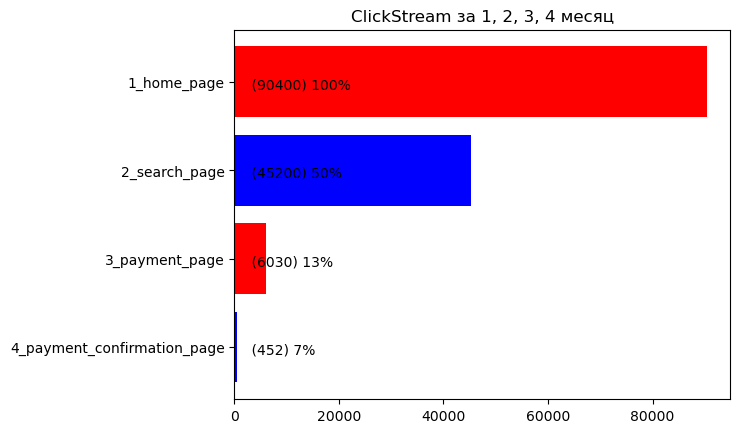

In [188]:
plt.barh(list(dict_toonel.keys()), list(dict_toonel.values()), color=['red', 'blue'])
plt.gca().invert_yaxis()
plt.title("ClickStream за 1, 2, 3, 4 месяц")
plt.text(5, 0.08, f"    ({dict_toonel['1_home_page']}) 100%")
plt.text(5, 1.08, f"    ({dict_toonel['2_search_page']}) {int((dict_toonel['2_search_page']/dict_toonel['1_home_page'])*100)}%")
plt.text(5, 2.08, f"    ({dict_toonel['3_payment_page']}) {int((dict_toonel['3_payment_page']/dict_toonel['2_search_page'])*100)}%")
plt.text(5, 3.08, f"    ({dict_toonel['4_payment_confirmation_page']}) {int((dict_toonel['4_payment_confirmation_page']/dict_toonel['3_payment_page'])*100)}%")
plt.show()

In [246]:
dict_toonel_month = {}
data_page = DATA[['page', 'data_month']]

for step in list_array_step:
    data_page = data_page[data_page['data_month'] == 4]
    dict_toonel_month[step] = data_page[data_page == step].count()

months_values = []

for i in range(4):
    months_values.append(list(dict_toonel_month.values())[i][0])

In [247]:
months_values

[22600, 9080, 597, 46]

# ClickStream

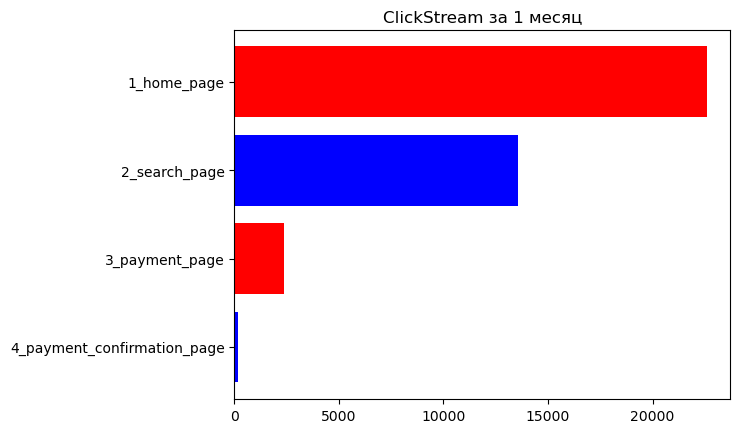

In [238]:
plt.barh(list(dict_toonel.keys()), months_values, color=['red', 'blue'])
plt.gca().invert_yaxis()
plt.title("ClickStream за 1 месяц")
plt.show()

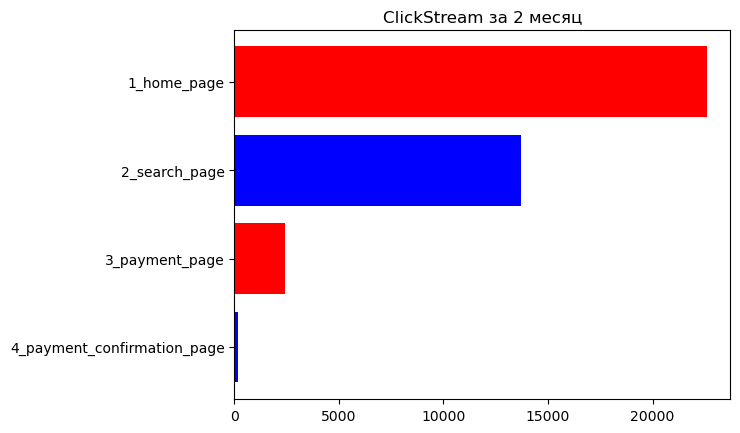

In [241]:
plt.barh(list(dict_toonel.keys()), months_values, color=['red', 'blue'])
plt.gca().invert_yaxis()
plt.title("ClickStream за 2 месяц")
plt.show()

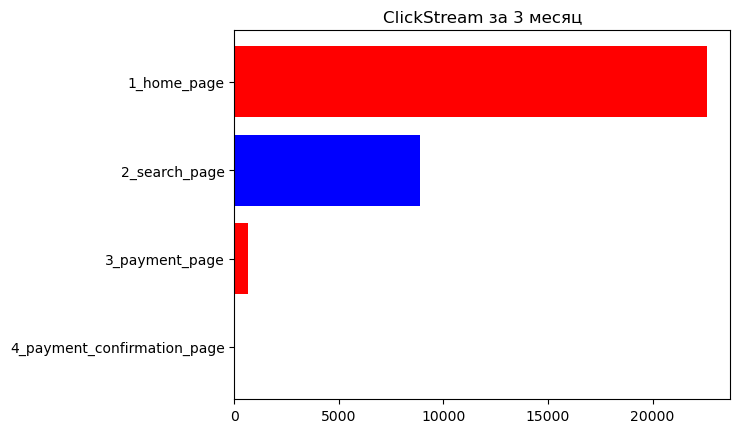

In [245]:
plt.barh(list(dict_toonel.keys()), months_values, color=['red', 'blue'])
plt.gca().invert_yaxis()
plt.title("ClickStream за 3 месяц")
plt.show()

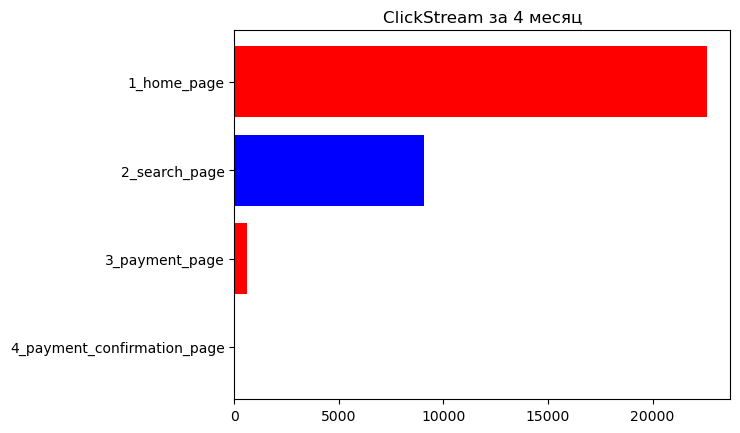

In [249]:
plt.barh(list(dict_toonel.keys()), months_values, color=['red', 'blue'])
plt.gca().invert_yaxis()
plt.title("ClickStream за 4 месяц")
plt.show()

In [274]:
DATA.head(10)

,id,page,data,user_int,pol,data_month
0,313593,1_home_page,2015-02-26,Desktop,Female,2
1,468315,1_home_page,2015-02-21,Desktop,Male,2
2,264005,1_home_page,2015-03-25,Desktop,Female,3
3,290784,1_home_page,2015-03-14,Desktop,Male,3
4,639104,1_home_page,2015-01-03,Desktop,Female,1
5,262889,1_home_page,2015-01-10,Mobile,Male,1
6,708793,1_home_page,2015-04-24,Mobile,Female,4
7,943143,1_home_page,2015-04-10,Desktop,Male,4
8,417894,1_home_page,2015-04-02,Mobile,Female,4
9,729374,1_home_page,2015-04-12,Desktop,Male,4


# Desktop

In [292]:
DATA[(DATA['data_month'] == 1) & (DATA['user_int'] == 'Desktop')]['page'].value_counts()

1_home_page                    15050
2_search_page                   7529
3_payment_page                  1221
4_payment_confirmation_page       60
Name: page, dtype: int64

In [293]:
DATA[(DATA['data_month'] == 2) & (DATA['user_int'] == 'Desktop')]['page'].value_counts()

1_home_page                    15050
2_search_page                   7632
3_payment_page                  1191
4_payment_confirmation_page       54
Name: page, dtype: int64

In [288]:
DATA[(DATA['data_month'] == 3) & (DATA['user_int'] == 'Desktop')]['page'].value_counts()

1_home_page                    15050
2_search_page                   7370
3_payment_page                   296
4_payment_confirmation_page       14
Name: page, dtype: int64

In [294]:
DATA[(DATA['data_month'] == 4) & (DATA['user_int'] == 'Desktop')]['page'].value_counts()

1_home_page                    15050
2_search_page                   7569
3_payment_page                   302
4_payment_confirmation_page       22
Name: page, dtype: int64

# Mobile

In [297]:
DATA[(DATA['data_month'] == 1) & (DATA['user_int'] == 'Mobile')]['page'].value_counts()

1_home_page                    7550
2_search_page                  6025
3_payment_page                 1169
4_payment_confirmation_page     129
Name: page, dtype: int64

In [298]:
DATA[(DATA['data_month'] == 2) & (DATA['user_int'] == 'Mobile')]['page'].value_counts()

1_home_page                    7550
2_search_page                  6055
3_payment_page                 1221
4_payment_confirmation_page     119
Name: page, dtype: int64

In [299]:
DATA[(DATA['data_month'] == 3) & (DATA['user_int'] == 'Mobile')]['page'].value_counts()

1_home_page                    7550
2_search_page                  1509
3_payment_page                  335
4_payment_confirmation_page      30
Name: page, dtype: int64

In [300]:
DATA[(DATA['data_month'] == 4) & (DATA['user_int'] == 'Mobile')]['page'].value_counts()

1_home_page                    7550
2_search_page                  1511
3_payment_page                  295
4_payment_confirmation_page      24
Name: page, dtype: int64

# Female

In [310]:
data_4 = DATA[(DATA['data_month'] == 4) & (DATA['pol'] == 'Female')]['page'].value_counts()
data_4

1_home_page                    11212
2_search_page                   4489
3_payment_page                   285
4_payment_confirmation_page       20
Name: page, dtype: int64

In [314]:
round((data_4['4_payment_confirmation_page']/data_4['1_home_page'])*100, 3)

0.178

In [315]:
data_3 = DATA[(DATA['data_month'] == 3) & (DATA['pol'] == 'Female')]['page'].value_counts()
data_3

1_home_page                    11250
2_search_page                   4454
3_payment_page                   337
4_payment_confirmation_page       26
Name: page, dtype: int64

In [316]:
round((data_3['4_payment_confirmation_page']/data_3['1_home_page'])*100, 3)

0.231

In [317]:
data_2 = DATA[(DATA['data_month'] == 2) & (DATA['pol'] == 'Female')]['page'].value_counts()
data_2

1_home_page                    11199
2_search_page                   6820
3_payment_page                  1235
4_payment_confirmation_page       86
Name: page, dtype: int64

In [318]:
round((data_2['4_payment_confirmation_page']/data_2['1_home_page'])*100, 3)

0.768

In [319]:
data_1 = DATA[(DATA['data_month'] == 1) & (DATA['pol'] == 'Female')]['page'].value_counts()
data_1

1_home_page                    11414
2_search_page                   6913
3_payment_page                  1243
4_payment_confirmation_page      109
Name: page, dtype: int64

In [320]:
round((data_1['4_payment_confirmation_page']/data_1['1_home_page'])*100, 3)

0.955

# Male

In [321]:
data_4 = DATA[(DATA['data_month'] == 4) & (DATA['pol'] == 'Male')]['page'].value_counts()
data_4

1_home_page                    11388
2_search_page                   4591
3_payment_page                   312
4_payment_confirmation_page       26
Name: page, dtype: int64

In [322]:
round((data_4['4_payment_confirmation_page']/data_4['1_home_page'])*100, 3)

0.228

In [306]:
data_3 = DATA[(DATA['data_month'] == 3) & (DATA['pol'] == 'Male')]['page'].value_counts()
data_3

1_home_page                    11350
2_search_page                   4425
3_payment_page                   294
4_payment_confirmation_page       18
Name: page, dtype: int64

In [323]:
round((data_3['4_payment_confirmation_page']/data_3['1_home_page'])*100, 3)

0.231

In [324]:
data_2 = DATA[(DATA['data_month'] == 2) & (DATA['pol'] == 'Male')]['page'].value_counts()
data_2

1_home_page                    11401
2_search_page                   6867
3_payment_page                  1177
4_payment_confirmation_page       87
Name: page, dtype: int64

In [325]:
round((data_2['4_payment_confirmation_page']/data_2['1_home_page'])*100, 3)

0.763

In [326]:
data_1 = DATA[(DATA['data_month'] == 1) & (DATA['pol'] == 'Male')]['page'].value_counts()
data_1

1_home_page                    11186
2_search_page                   6641
3_payment_page                  1147
4_payment_confirmation_page       80
Name: page, dtype: int64

In [327]:
round((data_1['4_payment_confirmation_page']/data_1['1_home_page'])*100, 3)

0.715